In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import pandas as pd
import random
from scipy.interpolate import PchipInterpolator  # PCHIP 1-D monotonic cubic interpolation
from scipy.interpolate import CubicSpline, UnivariateSpline, InterpolatedUnivariateSpline, splrep, splev, PPoly
from scipy.integrate import quad as integrate
from numpy.polynomial.polynomial import Polynomial

from utils.constants import MONTH_IN_SEC
from utils.preprocessing import datetime_index_to_floats
from utils.timing import time_measure
import matplotlib.pyplot as plt


def plot_dist(original: pd.Series, generated: pd.Series):
    with time_measure(f'plot_dist'):
        f_dates_orig = datetime_index_to_floats(original.index)
        f_dates_orig -= f_dates_orig[0]
        f_dates_gen = datetime_index_to_floats(generated.index)
        f_dates_gen -= f_dates_gen[0]
        united_dates = f_dates_orig.union(f_dates_gen)
        lin_orig = InterpolatedUnivariateSpline(f_dates_orig, original.values, k=1)
        lin_gen = InterpolatedUnivariateSpline(f_dates_gen, generated.values, k=1)
        all_values_orig = lin_orig(united_dates)
        all_values_gen = lin_gen(united_dates)
        diff = all_values_orig - all_values_gen
        
        
        plt.plot(f_dates_orig, original.values, '-', label='orig')
        plt.plot(f_dates_gen, generated.values, 'o--', label='gen')
#         plt.plot(united_dates, all_values_orig, '--', label='orig_lin')
#         plt.plot(united_dates, all_values_gen, ':', label='gen_lin')
        
        plt.plot(united_dates, diff, '-', label='diff')
#         plt.plot(united_dates, ppoly(united_dates), 'x:', label='ppoly')
        plt.legend(loc = 'best')
        plt.axhline(y=0, color='black', linestyle=':')
        plt.fill_between(united_dates, all_values_orig, all_values_gen, color='gray')
        plt.show()
        
        


In [3]:
import numpy as np
from nilmtk import STATS_CACHE

from utils.constants import DatasetType, DAY_IN_SEC
from utils.data_reading import clean_and_store_data, read_cleaned_data, \
    convert_to_nilmtk_format, store_processed_stable_periods, \
    get_full_keys_of_stable_periods, read_stable_periods, build_full_key
from utils.preprocessing import generate_sync_signals, get_stable_periods, \
    interpolate_missed_data, generate_async_signals, reformat_to_accumulated, generate_async_signals_by_point_count, generate_sync_signals_by_point_count
from utils.timing import time_measure
from utils.visualization import plot_sync_async_comparison

STATS_CACHE.store.close()


DS = DatasetType.IDEAL
DURATION = DAY_IN_SEC
MAX_GAP = 10
# TIME_DELTA = 5

full_keys = get_full_keys_of_stable_periods(DS, build_full_key('', DURATION, MAX_GAP, 0))
accumulated = read_stable_periods(DS, [full_keys[0]])[0]

[reading 1 stable periods of IDEAL] finished in 0m 1.15s


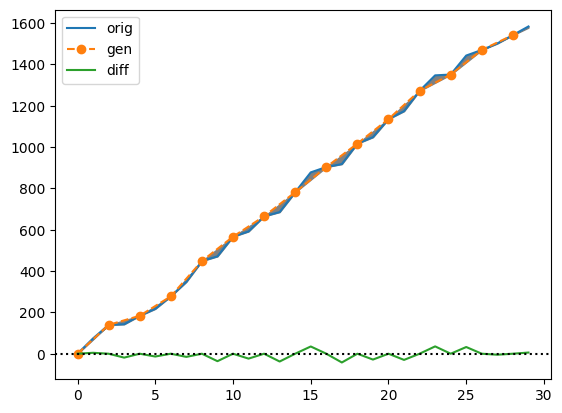

[plot_dist] finished in 0m 0.27s


In [256]:

signals = [0]
# step = random.random()
for i in range(30-1):
#     if random.random() > 0:
#         step = random.random()
    step = random.random()
    signals.append(signals[-1] + 1 + step * 100)
accumulated_part = pd.Series(signals, index=accumulated.index[:30])
point_count = 10
async_signals = generate_sync_signals_by_point_count(accumulated_part, point_count)
plot_dist(accumulated_part, async_signals)